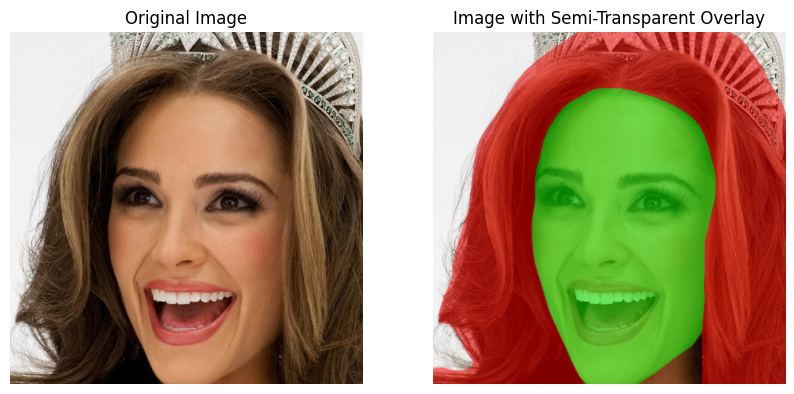

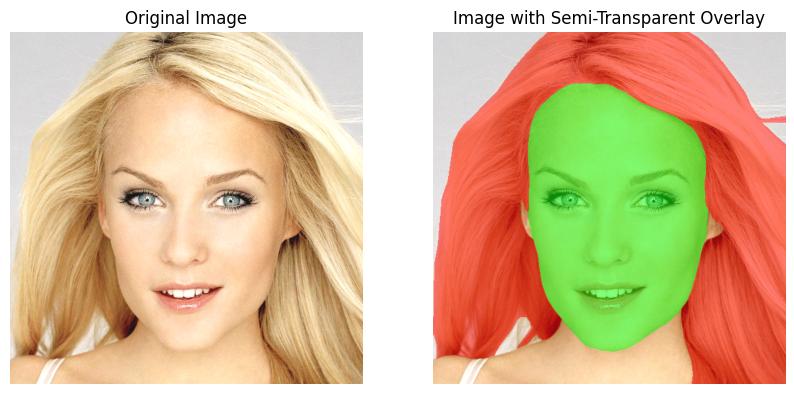

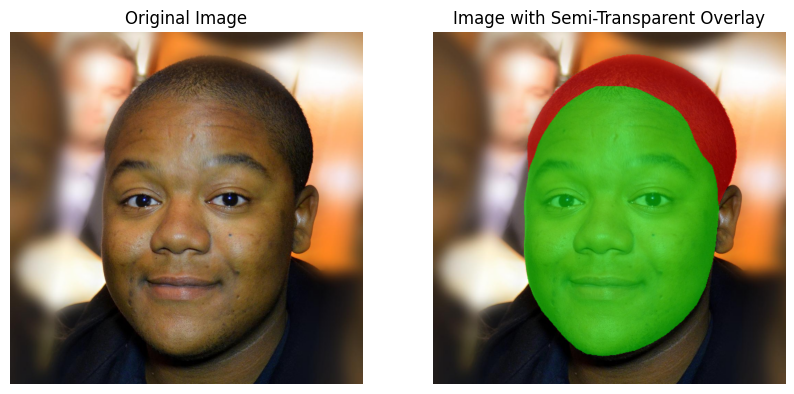

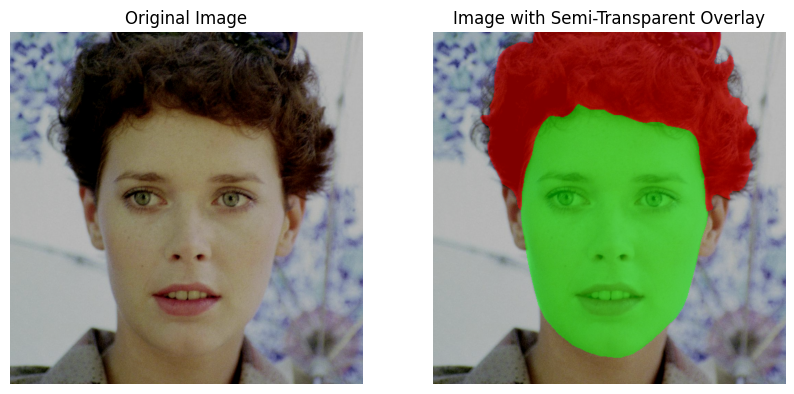

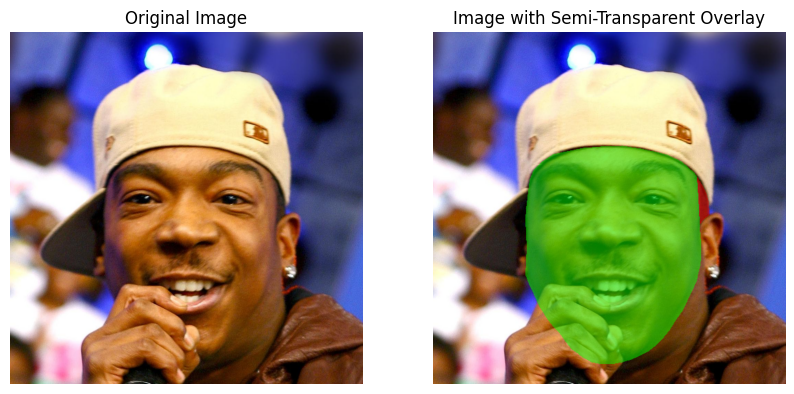

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../src")  # add src folder to Python path

from dataset import HairSegDataset, get_default_transforms

def visualize_sample_transparent(dataset, idx=0, alpha=0.5):
    """
    Visualizes an image with semi-transparent hair and skin overlays.
    alpha: float between 0 and 1 for transparency
    """
    image, mask = dataset[idx]

    # Convert tensor to numpy if needed
    if hasattr(image, 'permute'):  # torch tensor
        image = image.permute(1,2,0).numpy()

    overlay = image.copy()

    # Hair = Red
    hair_mask = mask == 2
    overlay[hair_mask] = (1 - alpha) * overlay[hair_mask] + alpha * np.array([255, 0, 0])

    # Skin = Green
    skin_mask = mask == 1
    overlay[skin_mask] = (1 - alpha) * overlay[skin_mask] + alpha * np.array([0, 255, 0])

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title("Image with Semi-Transparent Overlay")
    plt.imshow(overlay.astype(np.uint8))
    plt.axis('off')
    plt.show()


# Load the dataset
dataset = HairSegDataset("../data/images", "../data/masks", transform=get_default_transforms())

# Visualize first 5 samples
for i in range(5):
    visualize_sample_transparent(dataset, i, alpha=0.5)


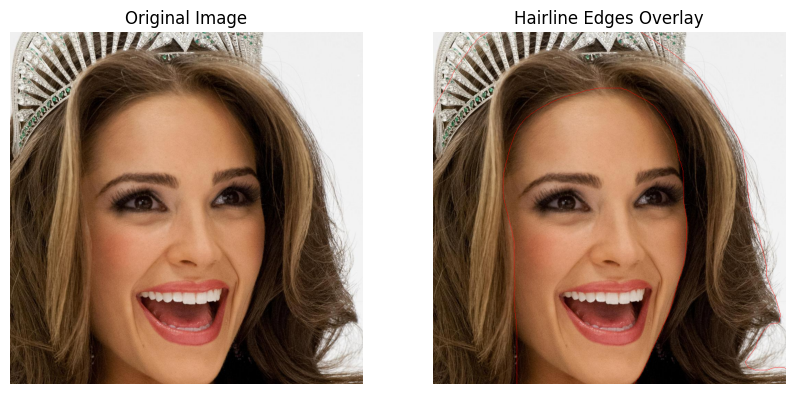

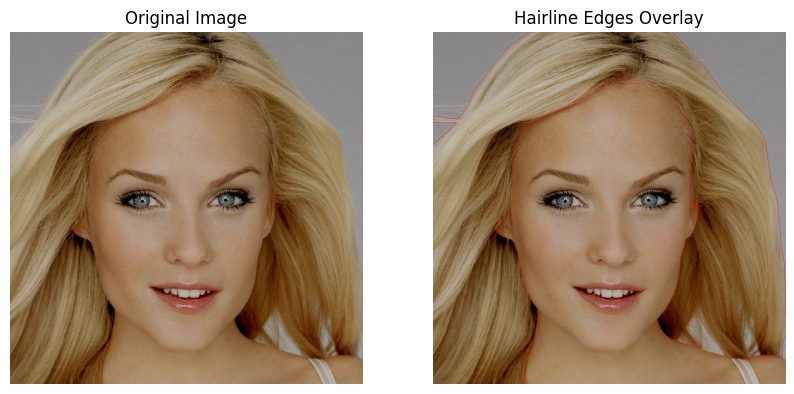

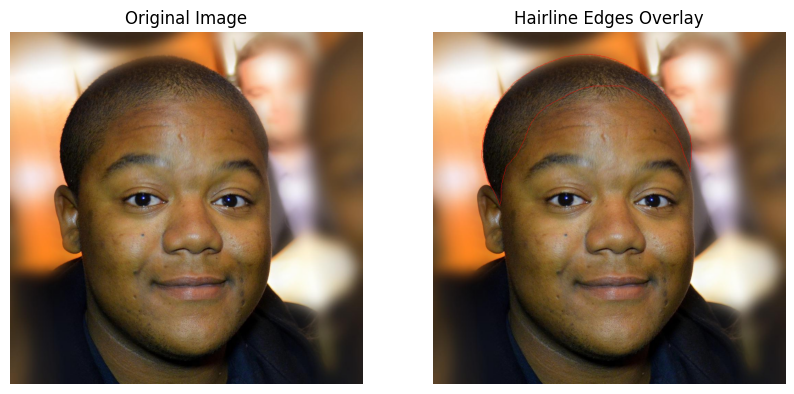

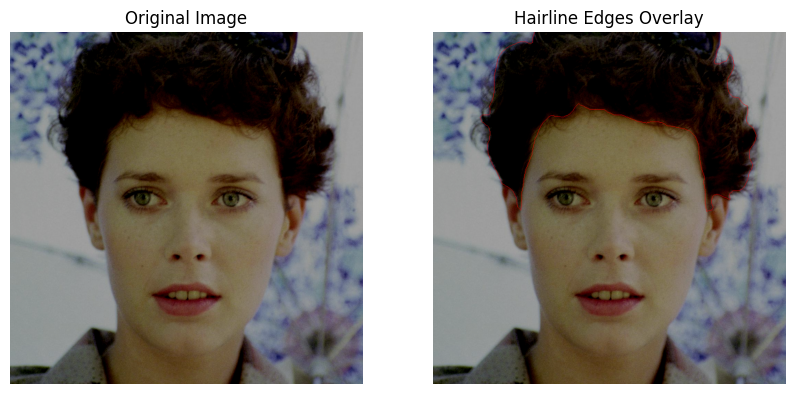

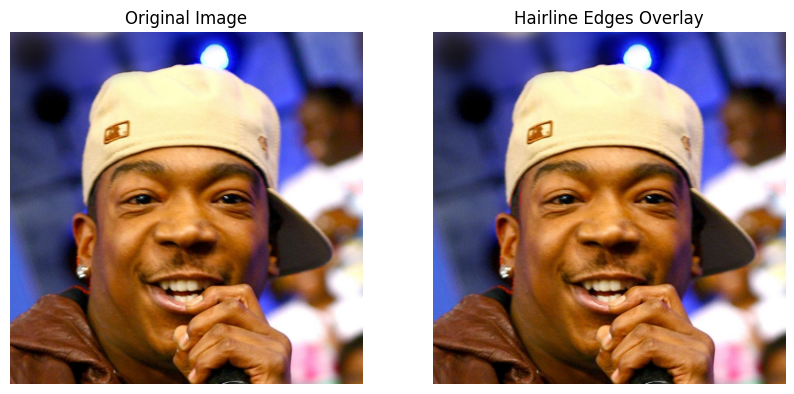

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys
sys.path.append("../src")  # add src folder to Python path

from dataset import HairSegDataset, get_default_transforms

def visualize_hairline_bottom(dataset, idx=0, line_color=[255,0,0]):
    """
    Visualizes only the hairline (bottom of hair mask) on the forehead.
    """
    image, mask = dataset[idx]

    # Convert tensors to numpy
    if hasattr(image, 'permute'):
        image = image.permute(1,2,0).numpy()
    if hasattr(mask, 'numpy'):
        mask = mask.numpy()

    # Extract hair mask
    hair_mask = (mask == 2).astype(np.uint8)

    # Initialize hairline mask
    hairline_mask = np.zeros_like(hair_mask)

    # For each column, find the bottom-most hair pixel
    for col in range(hair_mask.shape[1]):
        hair_indices = np.where(hair_mask[:, col] > 0)[0]
        if len(hair_indices) > 0:
            bottom_pixel = hair_indices.min()  # top-to-bottom index; min = top-most
            hairline_mask[bottom_pixel, col] = 1

    # Overlay on original image
    overlay = image.copy()
    overlay[hairline_mask == 1] = line_color

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title("Hairline Overlay")
    plt.imshow(overlay.astype(np.uint8))
    plt.axis('off')
    plt.show()


# Load dataset
dataset = HairSegDataset("../data/images", "../data/masks", transform=get_default_transforms())

# Visualize first 5 hairlines
for i in range(5):
    visualize_hairline(dataset, i)
